# Uber Analysis

Dataset content: Geography(USA,Srilanka and Pakistan). One year. Total number of drives, miles travelled, start location, end location, purpose of the drives, start date and end data.

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading Dataset
df = pd.read_csv("My Uber Drives - 2016.csv")
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


### Cleaning Dataset

In [4]:
#Removing '*' from column names
df.columns = df.columns.str.replace("*","")

In [5]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
#Gathering info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
#Checking shape of dataset
df.shape

(1156, 7)

In [8]:
#Checking statistics of dataset
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
#Checking for total null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

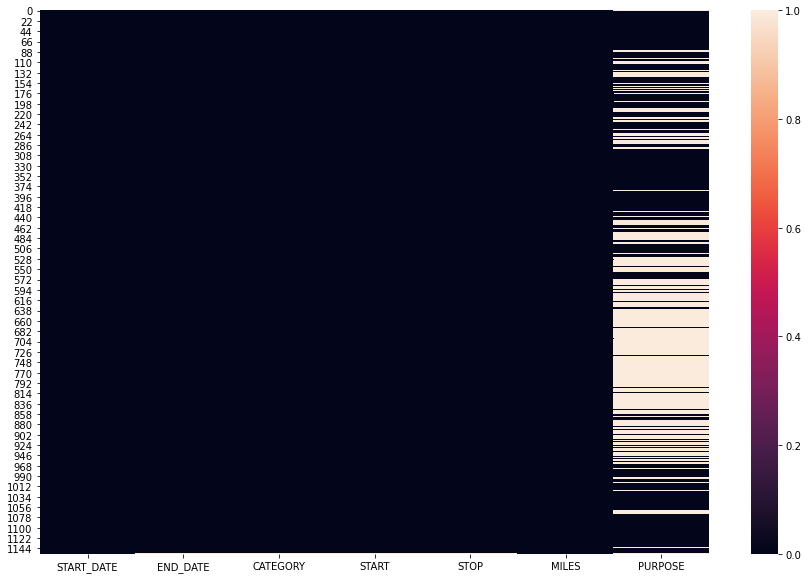

In [10]:
#Plotting null values for better understanding
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [11]:
#Droping rows having 'END_DATE','CATEGORY','START','STOP' columns with null values
df.dropna(axis=0, subset=['END_DATE','CATEGORY','START','STOP'], how='all', inplace=True)

In [12]:
#Again checking for total null values
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [13]:
#Checking for percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

START_DATE     0.000000
END_DATE       0.000000
CATEGORY       0.000000
START          0.000000
STOP           0.000000
MILES          0.000000
PURPOSE       43.463203
dtype: float64

In [14]:
#To not loose anymore data using forward fill(ffill) method 
df['PURPOSE'].fillna(method='ffill', inplace=True)

In [15]:
#Again checking for total null values
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [16]:
#Changing data type of 'START_DATE' and 'END_DATE' columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [17]:
#Now we can see for 'START_DATE' and 'END_DATE' columns datatype is change to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Data Analysis

In [18]:
#Checking for number of categories available
category = pd.crosstab(index = df['CATEGORY'], columns = 'Count of Records')
category

col_0,Count of Records
CATEGORY,
Business,1078
Personal,77


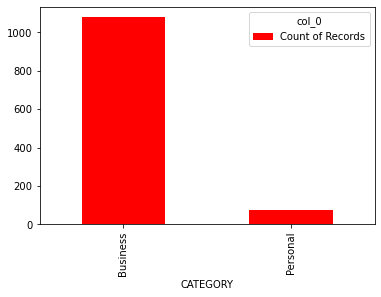

In [19]:
#Plotting category to understand variations in categories
category.plot(kind="bar", color="r")

In [20]:
#Finding from where we are getting lot of bookings
start_point = df.START.value_counts()
start_point

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Sand Lake Commons        1
Wake Forest              1
Flatiron District        1
Hayesville               1
Pontchartrain Beach      1
Name: START, Length: 177, dtype: int64

In [21]:
#Top 10 locations from where we are getting lot of bookings
start_point.head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: START, dtype: int64

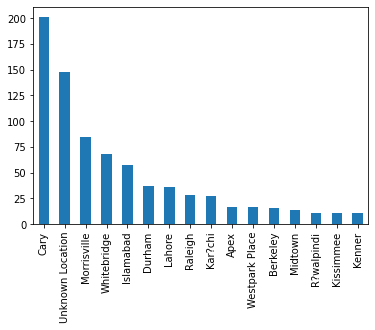

In [29]:
#Which are the locations where users have booked more than 10 number of times
start_point[start_point>10].plot(kind="bar")

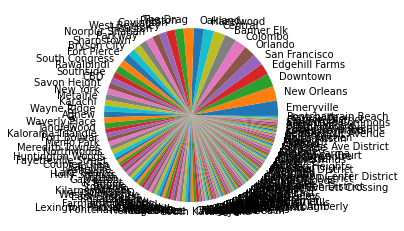

In [34]:
#Which are the locations where users have booked less than and equal to 10 number of times
start_point[start_point<=10].plot(kind="pie")

In [40]:
#Finding to where most people are travelling/going
stop_point = df.STOP.value_counts()
stop_point

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Arabi                 1
Tudor City            1
Huntington Woods      1
Walnut Terrace        1
Ilukwatta             1
Name: STOP, Length: 188, dtype: int64

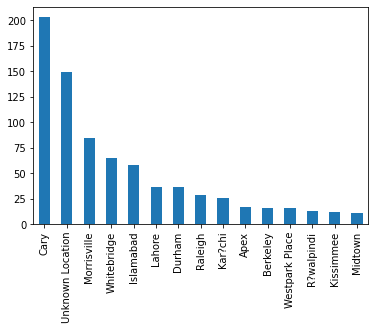

In [43]:
#Which are the locations where users have stopped more than 10 number of times
stop_point[stop_point>10].plot(kind="bar")

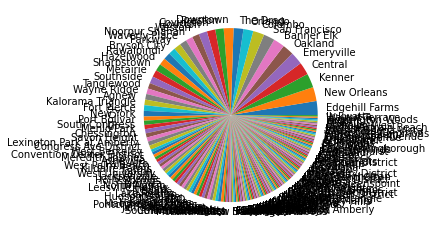

In [44]:
#Which are the locations where users have stopped less than and equal to 10 number of times
stop_point[stop_point<=10].plot(kind="pie")

In [46]:
#Finding how much miles people are travelling most of the time
miles = df.MILES.value_counts()
miles

9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

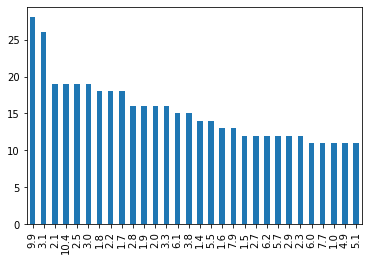

In [49]:
#Finding what are the miles people are most likely travelling more than 10 times
miles[miles>10].plot(kind="bar")

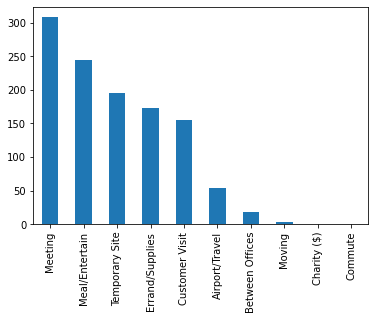

In [55]:
#Finding for what purpose people are mostly taking UBER
#Way1
df.PURPOSE.value_counts().plot(kind="bar")

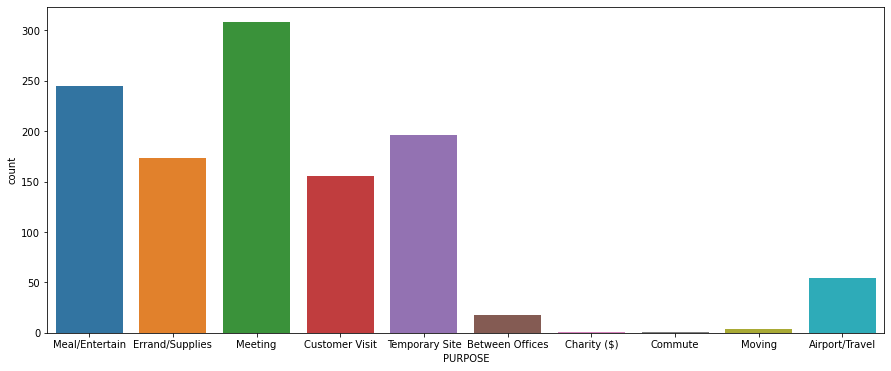

In [56]:
#Finding for what purpose people are mostly taking UBER
#Way2
plt.figure(figsize = (15, 6))
sns.countplot(df['PURPOSE'])